In [ ]:
!pip install dataprep
!pip install feature-engine
!pip install scikit-optimize
!pip install mixed-naive-bayes
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/ML_FINAL_PROJECT/Banking.csv"
df = pd.read_csv(PATH)
data = df.copy()
data.head()

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income  \
0  10000001                 7,000        < 1 year       Rent        68000.0   
1  10000002                30,000         4 years   Mortgage            NaN   
2  10000003                24,725         7 years   Mortgage        75566.4   
3  10000004                16,000        < 1 year        NaN        56160.0   
4  10000005                17,000         8 years        Own        96000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0              not verified                 car           18.37   
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
0                   0                      NaN                     9   
1                   0                     17.0                    12   
2                   0                      NaN                    12   
3                   3                      NaN                    16   
4                   1                      NaN                    19   

   Total_Accounts  Gender  Interest_Rate  
0              14  Female              1  
1              24  Female              3  
2              16    Male              3  
3              22    Male              3  
4              30  Female              1

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



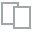
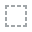
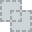
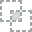
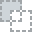
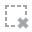
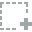
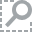
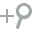
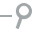
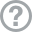
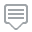
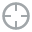
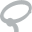
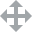
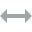
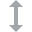
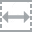
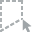
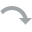
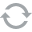
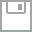
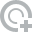
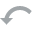
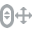
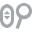
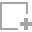
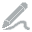
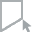
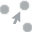
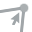
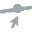

In [ ]:
report = create_report(df)
report.show()

### **Preprocessing for analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].str.replace(',', '').astype(int)

# Chuyển đổi kiểu dữ liệu từ số nguyên sang số thực (float)
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].astype(float)

In [ ]:
data.shape

(164309, 14)

## **Analysis**

Gender

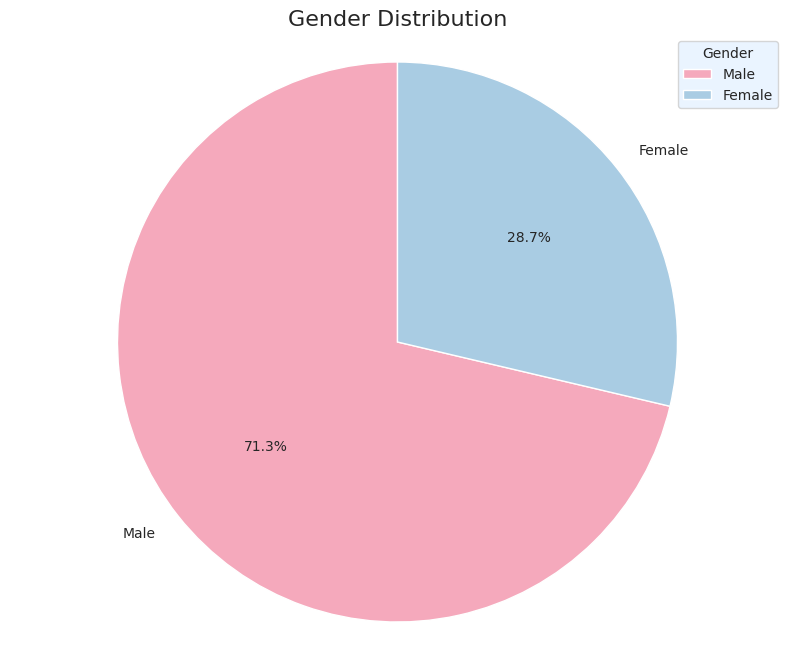

'\nTỷ lệ giới tính \n'

In [ ]:
# Thiết lập kiểu phông chữ và nền cho seaborn
sns.set_style("whitegrid")
# Đặt màu nền cho hình vẽ
plt.figure(figsize=(10, 8))
plt.rcParams['axes.facecolor'] = '#E5F2FF'  # Màu xanh nhẹ
# Đếm số lượng mẫu cho mỗi giới tính
gender_counts = data['Gender'].value_counts()
colors = ['#F5A9BC', '#A9CCE3']  # Màu sắc cho các phần tử
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white'})  # Tạo biểu đồ pie
plt.axis('equal')  # Đảm bảo hình bánh có hình dạng là hình tròn
# Trang trí biểu đồ
plt.title('Gender Distribution', fontsize=16)  # Tiêu đề biểu đồ
plt.legend(title='Gender', loc='best')  # Chú thích
# Hiển thị biểu đồ pie
plt.show()

'''
Tỷ lệ giới tính 
'''

Total Accounts and Debt_To_Income

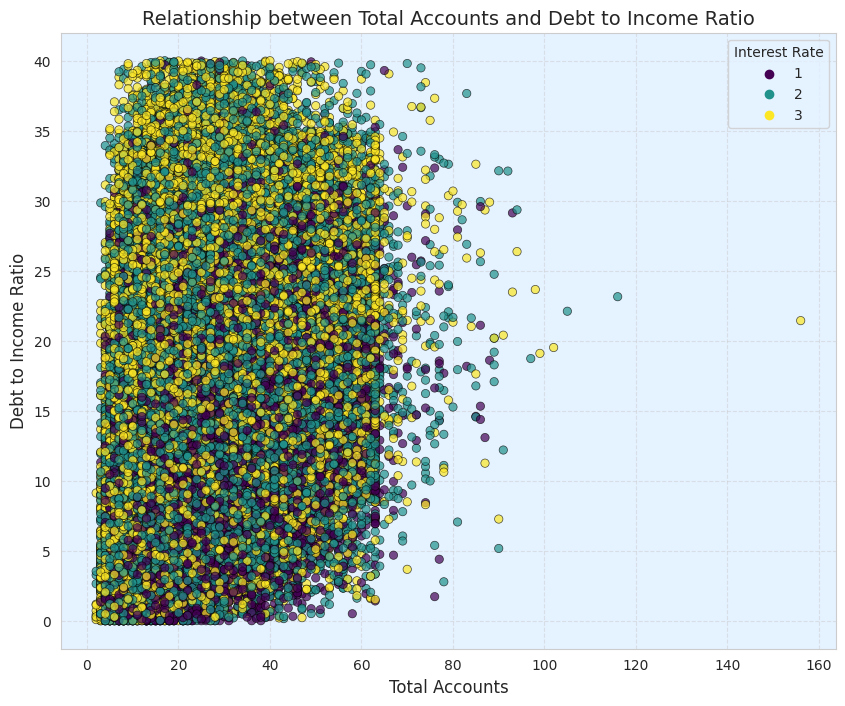

'\nMục đích của biểu đồ là:\n\nXem xét sự phân bố và mối quan hệ giữa số tài khoản tổng cộng và tỷ lệ nợ thu nhập.\nĐánh giá sự tương quan giữa các biến số, tức là xem liệu có mối liên hệ giữa số tài khoản tổng cộng và tỷ lệ nợ thu nhập không.\nXem xét sự phân tán và tương quan giữa các mức độ lãi suất khác nhau.\n'

In [ ]:
plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
# Sử dụng biểu đồ scatterplot từ thư viện seaborn
sns.scatterplot(x='Total_Accounts', y='Debt_To_Income', hue='Interest_Rate', data=data,
                palette='viridis', alpha=0.7, edgecolor='k', linewidth=0.5)
# Đặt tên cho trục x và trục y
plt.xlabel('Total Accounts', fontsize=12)
plt.ylabel('Debt to Income Ratio', fontsize=12)
# Đặt tiêu đề cho biểu đồ
plt.title('Relationship between Total Accounts and Debt to Income Ratio', fontsize=14)
# Đặt biểu đồ legend
plt.legend(title='Interest Rate', title_fontsize=10, loc='best')
# Tạo lưới cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
# Tăng kích cỡ các tick trên trục x và trục y
plt.tick_params(axis='both', which='major', labelsize=10)
# Hiển thị biểu đồ
plt.show()
'''
Mục đích của biểu đồ là:

Xem xét sự phân bố và mối quan hệ giữa số tài khoản tổng cộng và tỷ lệ nợ thu nhập.
Đánh giá sự tương quan giữa các biến số, tức là xem liệu có mối liên hệ giữa số tài khoản tổng cộng và tỷ lệ nợ thu nhập không.
Xem xét sự phân tán và tương quan giữa các mức độ lãi suất khác nhau.
'''



Loan Amount Requested

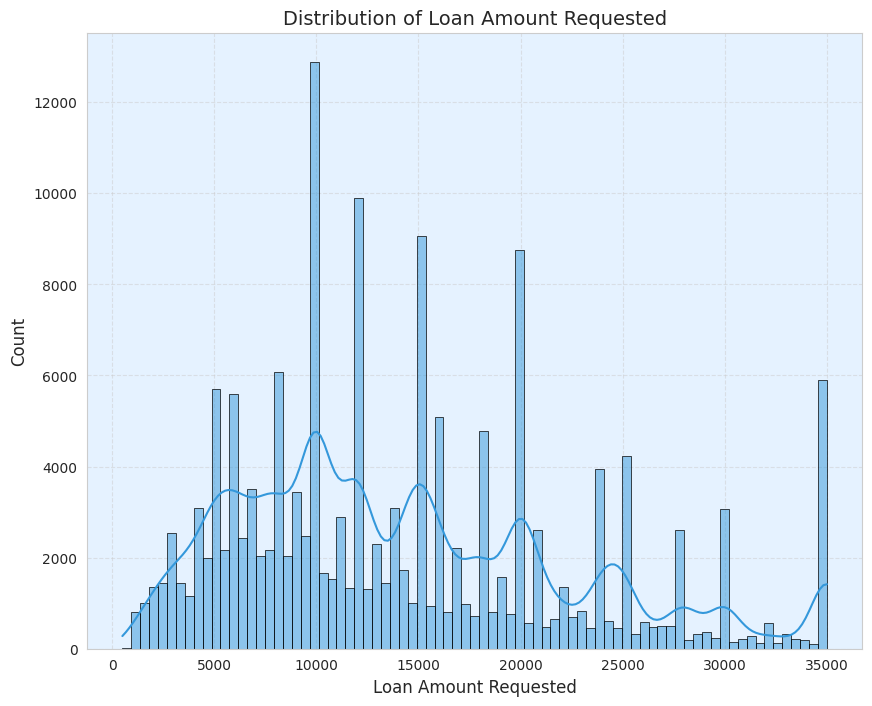

In [ ]:
plt.figure(figsize=(10, 8))  # Kích thước biểu đồ

# Sử dụng histplot từ thư viện seaborn
sns.histplot(data['Loan_Amount_Requested'], kde=True, color='#3498db', edgecolor='k', linewidth=0.5)

# Đặt tên cho trục x và trục y
plt.xlabel('Loan Amount Requested', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Đặt tiêu đề cho biểu đồ
plt.title('Distribution of Loan Amount Requested', fontsize=14)

# Tạo lưới cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)

# Tăng kích cỡ các tick trên trục x và trục y
plt.tick_params(axis='both', which='major', labelsize=10)

# Hiển thị biểu đồ
plt.show()


Interest Rate by Purpose Of Loan

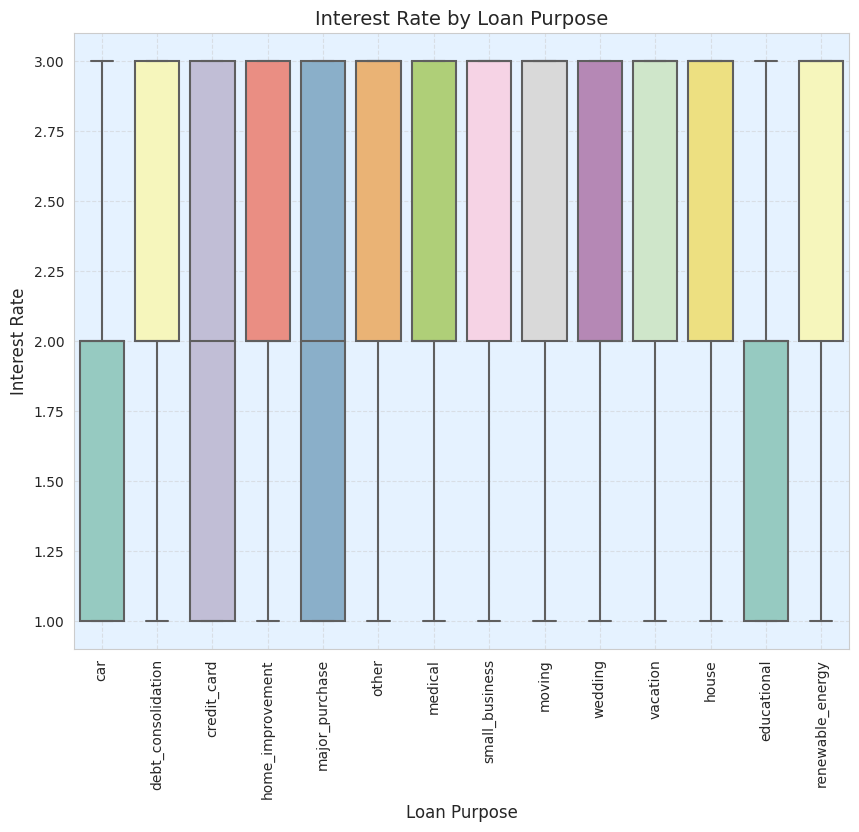

'\nKhi chúng ta trực quan hóa biểu đồ hộp của Interest_Rate theo Purpose_Of_Loan, \nchúng ta có thể so sánh phân phối lãi suất cho từng mục đích vay khác nhau. \nĐiều này giúp chúng ta hiểu rõ hơn về sự phân bố lãi \nsuất và có thể tìm ra sự khác biệt trong mức độ ảnh hưởng của mục đích vay đối với lãi suất.\n'

In [ ]:
plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
# Sử dụng boxplot từ thư viện seaborn
sns.boxplot(x='Purpose_Of_Loan', y='Interest_Rate', data=data, palette='Set3', linewidth=1.5)
# Đặt tên cho trục x và trục y
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)
# Đặt tiêu đề cho biểu đồ
plt.title('Interest Rate by Loan Purpose', fontsize=14)
# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=90)
# Tạo lưới cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
# Tăng kích cỡ các tick trên trục x và trục y
plt.tick_params(axis='both', which='major', labelsize=10)
# Hiển thị biểu đồ
plt.show()
'''
Khi chúng ta trực quan hóa biểu đồ hộp của Interest_Rate theo Purpose_Of_Loan, 
chúng ta có thể so sánh phân phối lãi suất cho từng mục đích vay khác nhau. 
Điều này giúp chúng ta hiểu rõ hơn về sự phân bố lãi 
suất và có thể tìm ra sự khác biệt trong mức độ ảnh hưởng của mục đích vay đối với lãi suất.
'''

Count of Loan Purpose

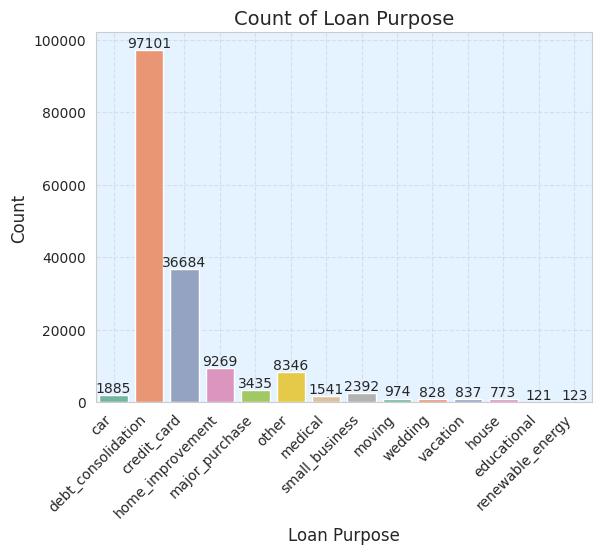

In [ ]:

# Sử dụng countplot từ thư viện seaborn
sns.countplot(data=data, x='Purpose_Of_Loan', palette='Set2')
# Đặt tên cho trục x và trục y
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Đặt tiêu đề cho biểu đồ
plt.title('Count of Loan Purpose', fontsize=14)
# Tạo lưới cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45, ha='right')
# Tăng kích cỡ các tick trên trục x và trục y
plt.tick_params(axis='both', which='major', labelsize=10)
# Hiển thị giá trị trên mỗi cột bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Hiển thị biểu đồ
plt.show()


Interest Rate by Length Employed and Gender

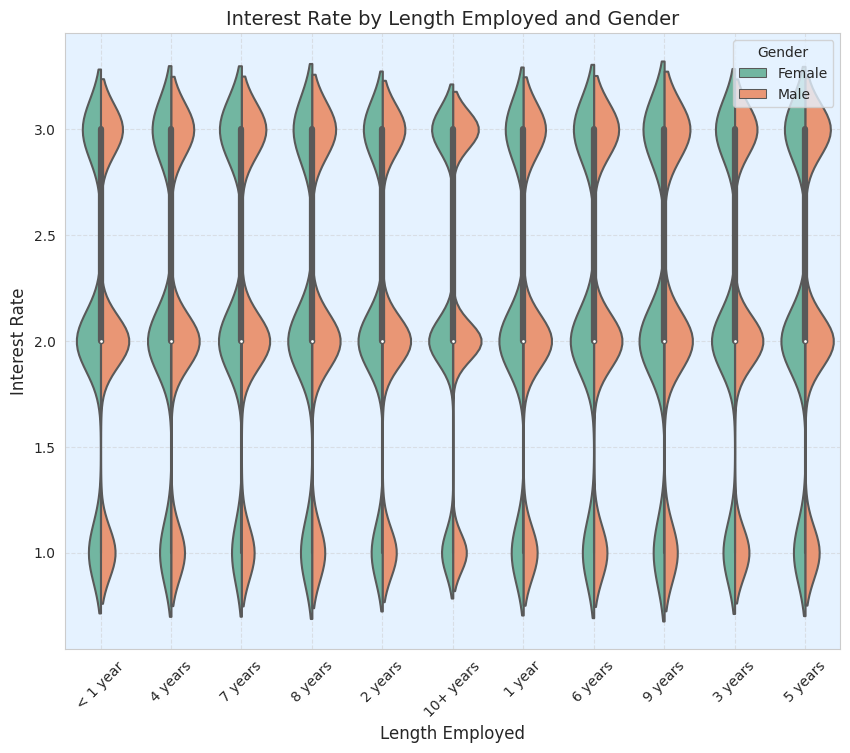

'\nKhi chúng ta trực quan hóa biểu đồ violin của Interest_Rate theo Length_Employed và Gender, \nchúng ta có thể so sánh phân phối lãi suất cho từng nhóm thời gian làm việc và giới tính khác nhau. \nĐiều này giúp chúng ta hiểu rõ hơn về sự phân bố lãi suất và có thể tìm ra sự khác biệt trong mức độ \nảnh hưởng của thời gian làm việc và giới tính đối với lãi suất.\n\n'

In [ ]:
plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
# Sử dụng violinplot từ thư viện seaborn
sns.violinplot(x='Length_Employed', y='Interest_Rate', hue='Gender', data=data, palette='Set2', split=True)
# Đặt tên cho trục x và trục y
plt.xlabel('Length Employed', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)
# Đặt tiêu đề cho biểu đồ
plt.title('Interest Rate by Length Employed and Gender', fontsize=14)
# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=45)
# Tạo lưới cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
# Tăng kích cỡ các tick trên trục x và trục y
plt.tick_params(axis='both', which='major', labelsize=10)
# Hiển thị biểu đồ
plt.show()

'''
Khi chúng ta trực quan hóa biểu đồ violin của Interest_Rate theo Length_Employed và Gender, 
chúng ta có thể so sánh phân phối lãi suất cho từng nhóm thời gian làm việc và giới tính khác nhau. 
Điều này giúp chúng ta hiểu rõ hơn về sự phân bố lãi suất và có thể tìm ra sự khác biệt trong mức độ 
ảnh hưởng của thời gian làm việc và giới tính đối với lãi suất.

'''

Spearman correlation matrix

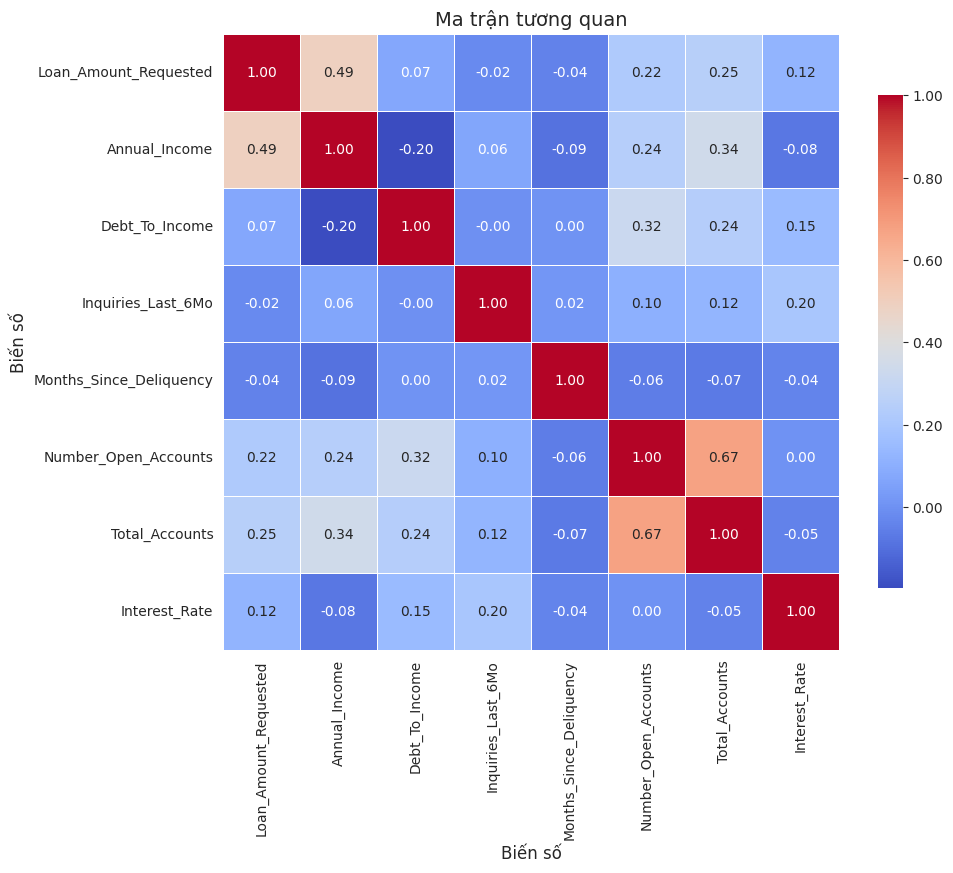

In [ ]:
# Lấy chỉ các cột chứa biến số
numerical_columns = ['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo',
                     'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']
# Tính toán ma trận tương quan spearman
corr_matrix = data[numerical_columns].corr(method='spearman')
# Vẽ heatmap
plt.figure(figsize=(10, 8))
# Tùy chỉnh màu sắc
cmap = sns.color_palette("coolwarm", as_cmap=True)
# Vẽ heatmap với viền
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8, 'format': '%.2f'}, 
            square=True, annot_kws={'fontsize': 10})
# Đặt tiêu đề cho heatmap
plt.title("Ma trận tương quan", fontsize=14)
# Định dạng số trên trục x và trục y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Hiển thị tên của các biến số
plt.xlabel("Biến số", fontsize=12)
plt.ylabel("Biến số", fontsize=12)
# Hiển thị biểu đồ
plt.show()


Matrix of nonlinear correlation coefficients

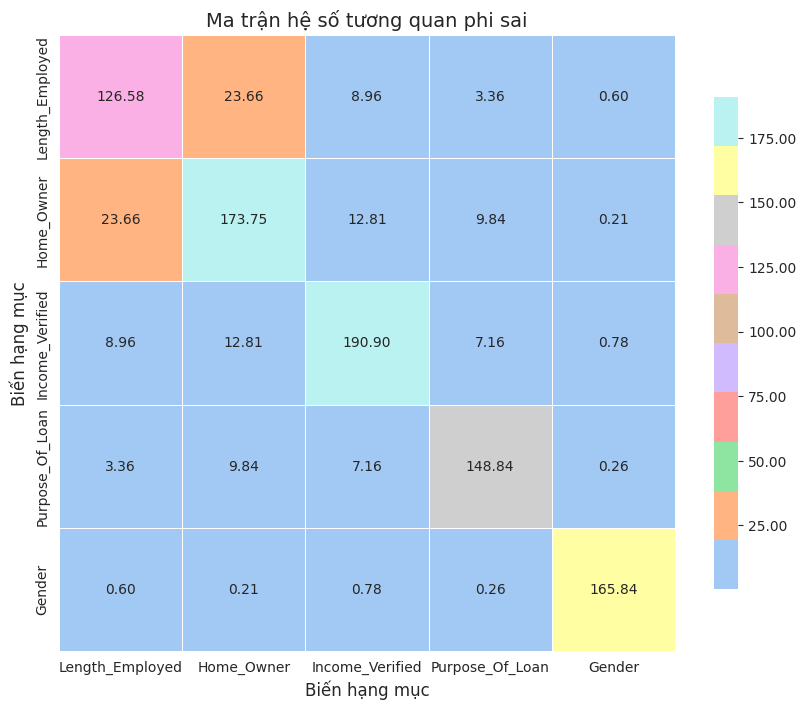

In [ ]:
# Lựa chọn các biến hạng mục cần tính toán tương quan
categorical_vars = ['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']
# Tạo một ma trận chứa hệ số tương quan phi sai
corr_matrix = np.zeros((len(categorical_vars), len(categorical_vars)))
# Tính toán hệ số tương quan phi sai
for i, var1 in enumerate(categorical_vars):
    for j, var2 in enumerate(categorical_vars):
        contingency_table = pd.crosstab(data[var1], data[var2])
        _, _, _, expected = chi2_contingency(contingency_table)
        corr_matrix[i, j] = np.sqrt(np.sum((contingency_table.values - expected)**2) / np.sum(expected))
# Hiển thị ma trận hệ số tương quan phi sai dưới dạng DataFrame
corr_data = pd.DataFrame(corr_matrix, index=categorical_vars, columns=categorical_vars)

# Tạo màu sắc sáng hơn với palette "pastel"
cmap = sns.color_palette("pastel")
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8, 'format': '%.2f'}, square=True)
plt.title("Ma trận hệ số tương quan phi sai", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Biến hạng mục", fontsize=12)
plt.ylabel("Biến hạng mục", fontsize=12)
plt.show()


# **Preprocessing**

In [ ]:
class QuantitativeImputer:
    def __init__(self, data):
        self.data = data

    def separate_data(self):
        known_data = self.data[self.data['Annual_Income'].notnull()]
        unknown_data = self.data[self.data['Annual_Income'].isnull()]
        return known_data, unknown_data

    def prepare_features(self, known_data, unknown_data):
        X = known_data[['Loan_Amount_Requested', 'Number_Open_Accounts', 'Total_Accounts']]
        y = known_data['Annual_Income']
        poly_features = PolynomialFeatures(degree=3)
        X_poly = poly_features.fit_transform(X)
        X_unknown_poly = poly_features.transform(unknown_data[['Loan_Amount_Requested', 'Number_Open_Accounts', 'Total_Accounts']])
        return X_poly, y, X_unknown_poly

    def train_model(self, X_poly, y):
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return model, y_pred

    def fill_missing_values(self, model, X_unknown_poly):
        y_unknown_pred = model.predict(X_unknown_poly)
        self.data.loc[self.data['Annual_Income'].isnull(), 'Annual_Income'] = y_unknown_pred
        return self.data


In [ ]:
class HomeOwnerImputer:
    def __init__(self, data):
        self.data = data
        self.label_mapping = {
            'Mortgage': 0,
            'None': 1,
            'Other': 2,
            'Own': 3,
            'Rent': 4
        }

    def separate_data(self):
        known_data = self.data[self.data['Home_Owner'].notnull()]
        unknown_data = self.data[self.data['Home_Owner'].isnull()]
        return known_data, unknown_data

    def prepare_features(self, known_data, unknown_data):
        X = known_data[['Length_Employed', 'Income_Verified']]
        y = known_data['Home_Owner']
        y_mapped = y.map(self.label_mapping)
        X_encoded = pd.get_dummies(X)
        X_encoded.columns = [col.replace('[', '(').replace(']', ')').replace('<', '') for col in X_encoded.columns]
        X_unknown = unknown_data[['Length_Employed', 'Income_Verified']]
        X_unknown_encoded = pd.get_dummies(X_unknown)
        X_unknown_encoded.columns = [col.replace('[', '(').replace(']', ')').replace('<', '') for col in X_unknown_encoded.columns]
        return X_encoded, y_mapped, X_unknown_encoded

    def train_model(self, X_encoded, y_mapped):
        model = xgb.XGBClassifier()
        model.fit(X_encoded, y_mapped)
        return model

    def fill_values(self, model, X_unknown_encoded):
        y_predicted_mapped = model.predict(X_unknown_encoded)
        label_mapping_inverse = {v: k for k, v in self.label_mapping.items()}
        y_predicted_ = pd.Series(y_predicted_mapped).map(label_mapping_inverse)
        y_predicted_array = np.array(y_predicted_)
        null_indices_Home_Owner = self.data['Home_Owner'].isnull()
        num_nulls_Home_Owner = null_indices_Home_Owner.sum()
        y_predicted_Home_Owner = y_predicted_array[:num_nulls_Home_Owner]
        unique_values, counts = np.unique(y_predicted_Home_Owner, return_counts=True)
        self.data.loc[null_indices_Home_Owner, 'Home_Owner'] = y_predicted_Home_Owner
        for value, count in zip(unique_values, counts):
            print(f"Giá trị {value}: {count} lần")



In [ ]:
class LengthEmployedImputer:
    def __init__(self, data):
        self.data = data
        self.label_mapping = {
            '< 1 year': 0,
            '1 year': 1,
            '2 years': 2,
            '3 years': 3,
            '4 years': 4,
            '5 years': 5,
            '6 years': 6,
            '7 years': 7,
            '8 years': 8,
            '9 years': 9,
            '10+ years': 10
        }

    def separate_data(self):
        known_data = self.data[self.data['Length_Employed'].notnull()]
        unknown_data = self.data[self.data['Length_Employed'].isnull()]
        return known_data, unknown_data

    def prepare_features(self, known_data, unknown_data):
        X = known_data[['Home_Owner', 'Income_Verified']]
        y = known_data['Length_Employed']
        y_mapped = y.map(self.label_mapping)
        X_encoded = pd.get_dummies(X)
        X_unknown = unknown_data[['Home_Owner', 'Income_Verified']]
        X_unknown_encoded = pd.get_dummies(X_unknown)
        return X_encoded, y_mapped, X_unknown_encoded

    def train_model(self, X_encoded, y_mapped):
        model = xgb.XGBClassifier()
        model.fit(X_encoded, y_mapped)
        return model

    def fill_values(self, model, X_unknown_encoded):
        y_predicted_mapped = model.predict(X_unknown_encoded)
        label_mapping_inverse = {v: k for k, v in self.label_mapping.items()}
        y_predicted_ = pd.Series(y_predicted_mapped).map(label_mapping_inverse)
        y_predicted_array = np.array(y_predicted_)
        null_indices_Length_Employed = self.data['Length_Employed'].isnull()
        num_nulls = null_indices_Length_Employed.sum()
        y_predicted_Length_Employed = y_predicted_array[:num_nulls]
        unique_values, counts = np.unique(y_predicted_Length_Employed, return_counts=True)
        self.data.loc[null_indices_Length_Employed, 'Length_Employed'] = y_predicted_Length_Employed
        for value, count in zip(unique_values, counts):
            print(f"Giá trị {value}: {count} lần")


**Fill missing value**

In [ ]:
def preprocessing_data(data):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    
    # xử lý dạng cột dạng đinh lượng
    # Sử dụng class QuantitativeImputer để xử lý dữ liệu
    data_imputer = QuantitativeImputer(data)
    known_data, unknown_data = data_imputer.separate_data()
    X_poly, y, X_unknown_poly = data_imputer.prepare_features(known_data, unknown_data)
    model, y_pred = data_imputer.train_model(X_poly, y)
    data_imputer.fill_missing_values(model, X_unknown_poly)

    #drop cot Months_Since_Deliquency
    data = data.drop('Months_Since_Deliquency', axis=1)

    
    # Xử lý cột dạng hạng mục
    # Sử dụng class HomeOwnerImputer để xử lý dữ liệu
    home_owner_imputer = HomeOwnerImputer(data)
    known_data_HomeOwner, unknown_data_HomeOwner = home_owner_imputer.separate_data()
    X_encoded_HomeOwner, y_mapped_HomeOwner, X_unknown_encoded_HomeOwner = home_owner_imputer.prepare_features(known_data_HomeOwner, unknown_data_HomeOwner)
    model_HomeOwner = home_owner_imputer.train_model(X_encoded_HomeOwner, y_mapped_HomeOwner)
    
    
    # Sử dụng class LengthEmployedImputer để xử lý dữ liệu
    length_employed_imputer = LengthEmployedImputer(data)
    known_data_LengthEmployed, unknown_data_LengthEmployed = length_employed_imputer.separate_data()
    X_encoded_LengthEmployed, y_mapped_LengthEmployed, X_unknown_encoded_LengthEmployed = length_employed_imputer.prepare_features(known_data_LengthEmployed, unknown_data_LengthEmployed)
    model_LengthEmployed = length_employed_imputer.train_model(X_encoded_LengthEmployed, y_mapped_LengthEmployed)
    
    print('Giá trị và số lần được điền khuyết: ')
    # Gán các giá trị dự đoán vào các hàng có giá trị null trong cột "Home_Owner" của DataFrame "data"
    home_owner_imputer.fill_values(model_HomeOwner, X_unknown_encoded_HomeOwner)
    # Gán các giá trị dự đoán vào các hàng có giá trị null trong cột "Length_Employed" của DataFrame "data"
    length_employed_imputer.fill_values(model_LengthEmployed, X_unknown_encoded_LengthEmployed)

    return data

In [ ]:
data = preprocessing_data(data.copy())

Giá trị và số lần được điền khuyết: 
Giá trị Mortgage: 16774 lần
Giá trị Rent: 8575 lần
Giá trị 10+ years: 7370 lần
Giá trị 5 years: 1 lần


In [ ]:
#Check missing value
data.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [ ]:
data

Loan_ID  Loan_Amount_Requested Length_Employed Home_Owner  \
0       10000001                 7000.0        < 1 year       Rent   
1       10000002                30000.0         4 years   Mortgage   
2       10000003                24725.0         7 years   Mortgage   
3       10000004                16000.0        < 1 year       Rent   
4       10000005                17000.0         8 years        Own   
...          ...                    ...             ...        ...   
164304  10164305                20725.0       10+ years       Rent   
164305  10164306                 6000.0         8 years        Own   
164306  10164307                20250.0       10+ years   Mortgage   
164307  10164308                10000.0         4 years       Rent   
164308  10164309                 9250.0       10+ years       Rent   

        Annual_Income           Income_Verified     Purpose_Of_Loan  \
0        68000.000000              not verified                 car   
1       111781.150712         VERIFIED - income  debt_consolidation   
2        75566.400000  VERIFIED - income source  debt_consolidation   
3        56160.000000  VERIFIED - income source  debt_consolidation   
4        96000.000000  VERIFIED - income source  debt_consolidation   
...               ...                       ...                 ...   
164304   76179.011095  VERIFIED - income source         credit_card   
164305   64066.198830  VERIFIED - income source      small_business   
164306   85797.600411         VERIFIED - income         credit_card   
164307   80655.867633              not verified      major_purchase   
164308   49271.422270         VERIFIED - income         credit_card   

        Debt_To_Income  Inquiries_Last_6Mo  Number_Open_Accounts  \
0                18.37                   0                     9   
1                14.93                   0                    12   
2                15.88                   0                    12   
3                14.34                   3                    16   
4                22.17                   1                    19   
...                ...                 ...                   ...   
164304           13.56                   0                    13   
164305            9.12                   0                    13   
164306           18.17                   1                    17   
164307           18.75                   1                    16   
164308           19.44                   1                     5   

        Total_Accounts  Gender  Interest_Rate  
0                   14  Female              1  
1                   24  Female              3  
2                   16    Male              3  
3                   22    Male              3  
4                   30  Female              1  
...                ...     ...            ...  
164304              16    Male              2  
164305              30    Male              2  
164306              30    Male              1  
164307              62  Female              3  
164308               9  Female              2  

[164309 rows x 13 columns]

In [ ]:
from skopt import BayesSearchCV
from skopt.plots import plot_objective, plot_histogram

In [ ]:
from feature_engine.encoding import RareLabelEncoder, MeanEncoder
from feature_engine.discretisation import DecisionTreeDiscretiser
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

In [ ]:
from mixed_naive_bayes import MixedNB

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

NameError: ignored

In [ ]:
class MultiLabelClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model_type, **kwargs):
        self.model_type = model_type
        self.__create_model__(**kwargs)

    def __create_model__(self, **kwargs):
        if self.model_type == 'logistic':
            self.model = LogisticRegression(multi_class="multinomial", **kwargs)
        elif self.model_type == 'naive_bayes':
            self.model = MixedNB(**kwargs)
        elif self.model_type == 'svm':
            self.model = OneVsRestClassifier(SVC(**kwargs))
        elif self.model_type == 'decision_tree':
            self.model = DecisionTreeClassifier(**kwargs)
        elif self.model_type == 'random_forest':
            self.model = RandomForestClassifier(**kwargs)
        elif self.model_type == 'gradient_boosting':
            self.model = GradientBoostingClassifier(**kwargs)
        elif self.model_type == 'neural_network':
            self.model = MLPClassifier(**kwargs)
        else:
            raise Exception('Model type should only be one of those values: ' \
                            'logistic, naive_bayes, svm, decision_tree, ' \
                            'random_forest, gradient_boosting, neural_network')
        return self
    
    def fit(X, y, sample_weight=None):
        self.model.fit(X, y, sample_weight)
        return self

    def predict(X):
        y_pred = self.model.predict(X)
        return y_pred